# Common code

In [276]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
    
x_samples = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y_samples = np.array([-53.9, -28.5, -20.7, -3.6, -9.8, 5.0, 4.2, 5.1, 11.4, 27.4, 44.0])
initial_theta = np.array([0, 0, 0, 0])
sample_size = x_samples.shape[0]

def plot_cost(cost, title):
    '''
    Plot cost function
    :param cost: array of cost values per each iteration
    :param title: Title of the chart
    '''
    plt.plot(cost)    
    plt.title(title)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.show()
    print('Last error: ' + str(cost[-1]))
    
def calculate_error(theta):
    '''    
    Cost function that we need to minimize    
    Parameters:
        theta[3] is the constant in the cubic function
        theta[0] is multiplied by x**3 in the cubic function
    '''
    hypothesis = np.polyval(theta, x_samples)
    return np.sum(np.square(hypothesis - y_samples))

def plot_model(theta, title):
    '''    
    Plots a cubic function model against the given data points
    Parameters:
        theta[3] is the constant in the cubic function
        theta[0] is multiplied by x**3 in the cubic function
    '''    
    curve_x = np.linspace(-6,6,100)
    curve_y = np.polyval(theta, curve_x)
    
    plt.plot(x_samples, y_samples, 'ro')
    plt.plot(curve_x, curve_y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print('Theta values:' + str(theta))    

## Part 1
Gradient descent with learning rate 1e-5 and 50 iterations

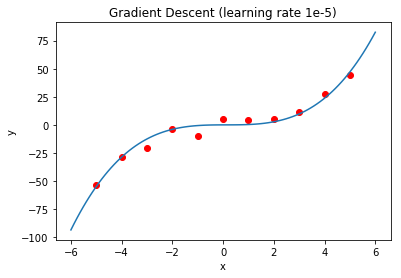

Theta values:[ 0.40582178 -0.15346867  0.05946159 -0.00842238]


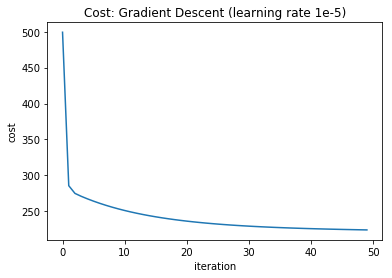

Last error: 224.107804051


In [277]:
def calculate_gradient(theta):
    # gradient for each coefficient:
    # gradient[0] is for coefficient "a"
    # gradient[1] is for coefficient "b"
    # gradient[2] is for coefficient "c"
    # gradient[3] is for coefficient "d"
    gradient = [0, 0, 0, 0]
    
    # iterate through each data point to calculate the gradient
    for (x, y) in zip(x_samples, y_samples):
        hypothesis = np.polyval(theta, x)
        loss = y - hypothesis
        gradient[0] += loss * (x ** 3)
        gradient[1] += loss * (x ** 2)
        gradient[2] += loss * x
        gradient[3] += loss
    
    return -2 * np.array(gradient)

def gradient_descent(alpha, iterations):
    theta = initial_theta
    m = sample_size
    
    # save partial cost values
    cost_decay = list()    
    
    for i in range(iterations):
        # calculate gradient
        gradient = calculate_gradient(theta)
        
        # update theta (params)
        theta = theta - (alpha * gradient)
        
        # save partial cost to plot chart later
        cost_decay.append(calculate_error(theta))
        
    return theta, cost_decay

'''
Part 1
Gradient descent with learning rate 1e-5
50 iterations
'''
theta, cost = gradient_descent(1.0e-5, 50)
plot_model(theta, 'Gradient Descent (learning rate 1e-5)')
plot_cost(cost, 'Cost: Gradient Descent (learning rate 1e-5)')

## Part 2
Gradient descent with learning rate 1e-4 and 50 iterations

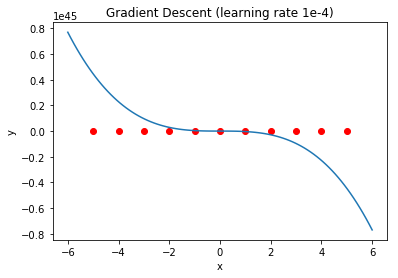

Theta values:[ -3.55918263e+42  -1.37892935e+22  -1.69916825e+41   2.98472220e+22]


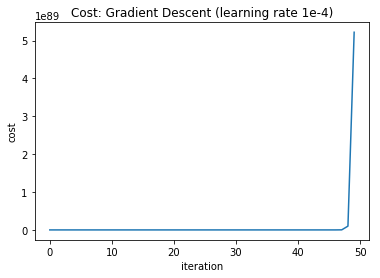

Last error: 5.22130488436e+89


In [278]:
'''
Part 2
Gradient descent with learning rate 1e-4
50 iterations
'''    
theta, cost = gradient_descent(1.0e-4, 50)
plot_model(theta, 'Gradient Descent (learning rate 1e-4)')
plot_cost(cost, 'Cost: Gradient Descent (learning rate 1e-4)')

## Part 3
BFGS without jacobian function passed

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 11


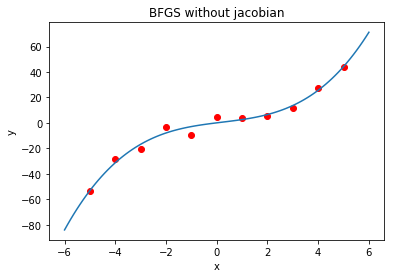

Theta values:[ 0.29123926 -0.1799534   2.45957746  0.03589768]


In [279]:
'''
Part 3
BFGS without jacobian function passed
'''
res = minimize(calculate_error, initial_theta, method='BFGS', options={'disp':True})
plot_model(res.x, 'BFGS without jacobian')

## Part 4
BFGS with jacobian function passed

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11


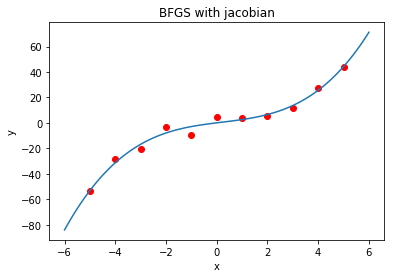

Theta values:[ 0.29123932 -0.17995338  2.45957653  0.03589744]


In [280]:
'''
Part 4
BFGS with jacobian function passed
'''
res = minimize(calculate_error, initial_theta, method='BFGS', jac=calculate_gradient, options={'disp':True})
plot_model(res.x, 'BFGS with jacobian')

## Part 5
Nelder Mead

Optimization terminated successfully.
         Current function value: 127.565070
         Iterations: 360
         Function evaluations: 602


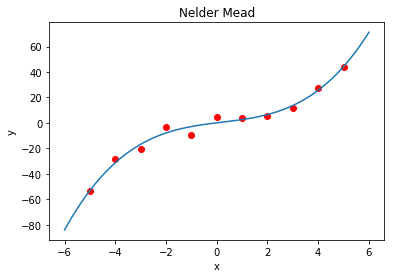

Theta values:[ 0.29124112 -0.17995509  2.45954951  0.03587784]


In [281]:
'''
Part 5
Nelder Mead
'''
res = minimize(calculate_error, initial_theta, method='Nelder-Mead', options={'disp':True})
plot_model(res.x, 'Nelder Mead')

## Part 6
Tensorflow with AdamOptimizer using stochastic gradient descent 200 iterations

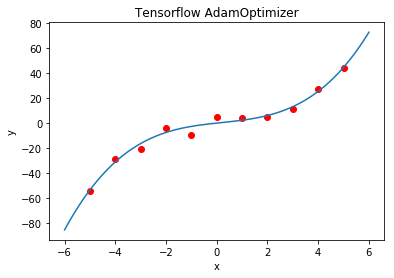

Theta values:[0.30540875, -0.1771159, 2.1656992, -0.0038549362]


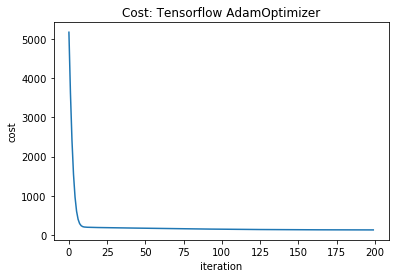

Last error: 129.005


In [282]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def tensor(learning_rate, iterations):
    cost_decay = list()

    # Training Data
    train_X = x_samples
    train_Y = y_samples
    n_samples = train_X.shape[0]

    # tf Graph Input
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    a = tf.Variable(0.0, name="a")
    b = tf.Variable(0.0, name="b")
    c = tf.Variable(0.0, name="c")
    d = tf.Variable(0.0, name="d")

    # Construct a cubic model
    pred = a*X**3 + b*X**2 + c*X + d

    # Cost function
    cost = tf.reduce_sum(tf.pow(Y - pred, 2))
    
    # Adam Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(iterations):
            # Stochastic gradient descent: we are processing one data point per iteration
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})

            cost_value = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            cost_decay.append(cost_value)            

        theta = [sess.run(a),sess.run(b),sess.run(c),sess.run(d)]
        return theta, cost_decay

'''
Part 6
Tensorflow with AdamOptimizer  
'''
theta, cost_decay = tensor(0.01, 200)
plot_model(theta, 'Tensorflow AdamOptimizer')
plot_cost(cost_decay, 'Cost: Tensorflow AdamOptimizer')